In [1]:
# First, load any modules you need here.

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as colors

import scipy.linalg as scipy_linalg

import scipy.optimize as optimize

import scipy.integrate as integrate

import scipy.ndimage as scipy_ndimage


# Fourier Series

<h3>

Let's say we have some function that's periodic.  We can take the period it repeats on and show that only certain frequencies can exist on that period.

For example, let's look at a repeating triangle with a period of $2\pi$.

</h3>

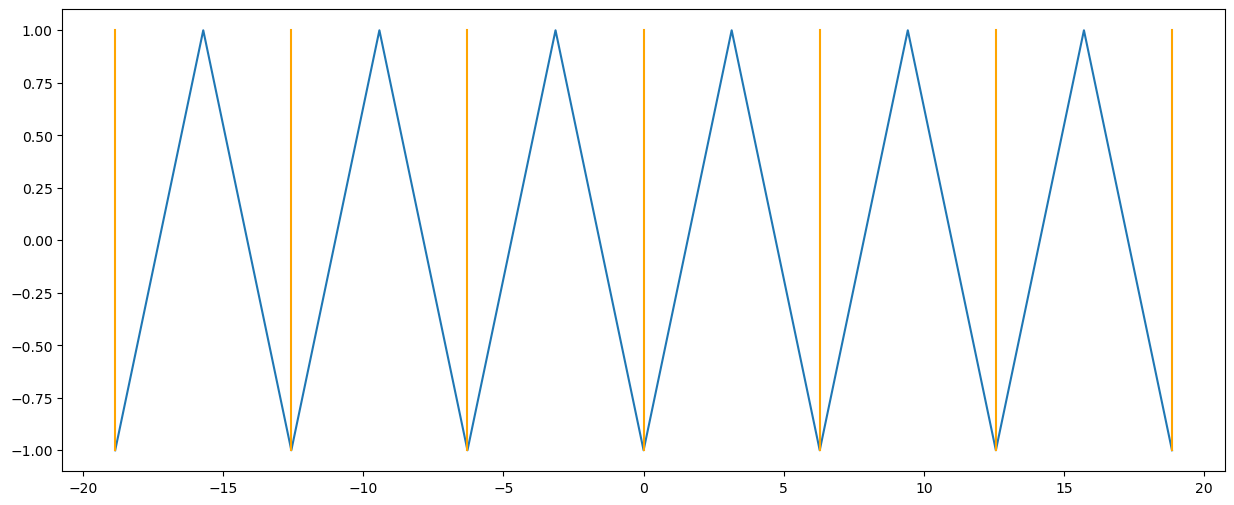

In [2]:

# make x gor from -6*pi to 6*pi 

x = (np.arange(1201)/100-6) * np.pi


#triangle = np.abs(np.pi-(x+np.pi/2.)%(2.*np.pi))/np.pi*2-1
triangle = np.abs(np.pi-(x+np.pi)%(2.*np.pi))/np.pi*2-1

plt.figure(figsize=(15,6))


plt.plot(x,triangle)
plt.plot([np.pi*0.,np.pi*0.],[-1,1],'orange')
plt.plot([np.pi*2.,np.pi*2.],[-1,1],'orange')
plt.plot([np.pi*4.,np.pi*4.],[-1,1],'orange')
plt.plot([np.pi*6.,np.pi*6.],[-1,1],'orange')
plt.plot([np.pi*-2.,np.pi*-2.],[-1,1],'orange')
plt.plot([np.pi*-4.,np.pi*-4.],[-1,1],'orange')
plt.plot([np.pi*-6.,np.pi*-6.],[-1,1],'orange')
plt.show()


<h3>

You could think of this like a string vibrating.  The ends of the string are fixed, so only vibrations that fit the length of the string are allowed.  

Let's try adding some different cosines together to make our shape.  Just one cosine is a little too wide at the peak, and a little too narrow at the base.  The second frequency doesn't actually help us fix this problem, so we'll skip it.

But if we add in a little of the 3rd frequency, it will help.  Let's give it a try:
</h3>

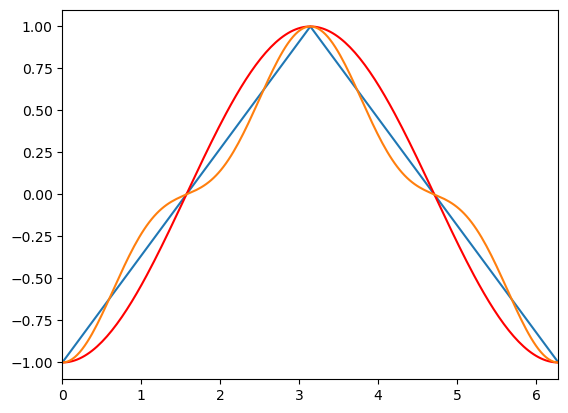

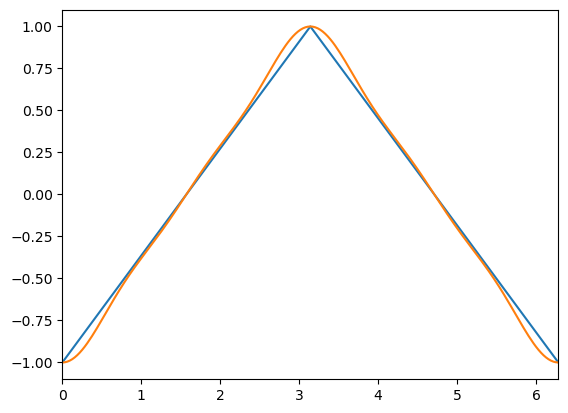

In [4]:
# Just plot one period

plt.plot(x,triangle)
plt.plot(x,-np.cos(x),'red')
plt.plot(x,(-np.cos(x)*.8-np.cos(x*3)*.2))
plt.xlim([0,2.*np.pi])

plt.show()


# That's probably overkill.  Let's tone it down a little and add in some of the 5th frequency:

plt.plot(x,triangle)
#plt.plot(x,-np.cos(x),'red')
plt.plot(x,(-np.cos(x)*.87-np.cos(x*3)*.1-np.cos(x*5)*.03))
plt.xlim([0,2.*np.pi])

plt.show()


<h3>

This isn't looking too bad, but doing this by hand it's going to be hard to get a good fit.  

In fact, to get the exact shape back we need to add in an infinite number of frequencies - $n = 1,2,3,4,...$ that each need to be multiplied by the right number to get get the shape.  Adjusting infinite number by hand isn't going to work.

Fortunately, there's a formula to get those leading numbers.
    
</h3>


<h3>
We can take a repeating function or a function on a limited interval and trun it into a series of Sines or Cosines.  This is called a Fourier series. 
    
Mathematically, for a function repeating on an interval $-L$ to $L$, the Fourier Serise looks like
    
$f(x) = a_0/2 + \sum_1^\infty a_n \cos(\frac{n \pi x}{L}) + \sum_1^\infty b_n \sin(\frac{n \pi x}{L})$
    
Where the $a_n$ and $b_n$ coefficients are
    
$a_n = \frac{1}{L} \int_{-L}^{L} f(x) \cos(\frac{n \pi x}{L}) dx $
    
$b_n = \frac{1}{L} \int_{-L}^{L} f(x) \sin(\frac{n \pi x}{L}) dx $
    

We can calculate the coefficeints numerically using integration.  Let's take a look at how to do this:

</h3>

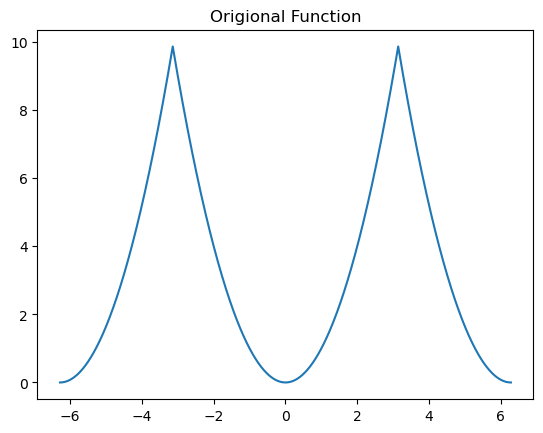

a_n =  [ 6.57973627 -4.          1.         -0.44444444  0.25       -0.16
  0.11111111 -0.08163265  0.0625     -0.04938272]
b_n =  [ 0.00000000e+00  4.56516152e-16 -3.24008575e-16  3.12452801e-16
 -1.55830565e-16 -1.55058265e-16 -1.43284944e-17  2.18691422e-16
 -2.19647830e-16  3.35944155e-16]


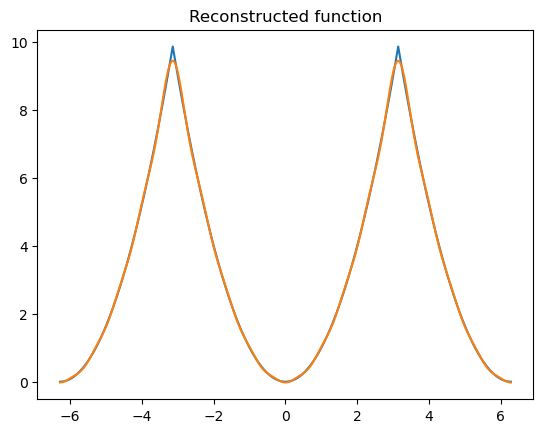

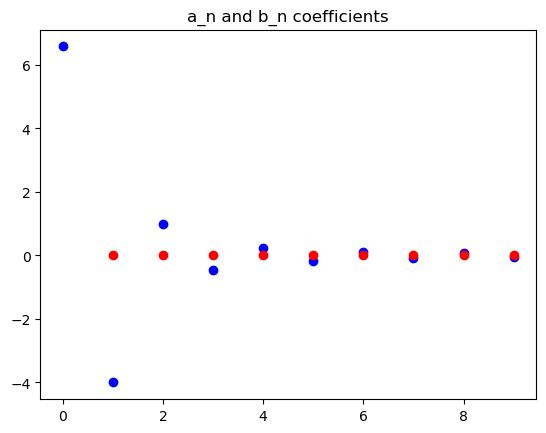

In [5]:
# Define a function and calculate the Fourier coefficients numerically

# Set up number of points and limits of plots:

n_points = 1001    # number of points to plot

min_x = -2.*np.pi  # minimum value of x to calculate the function over
max_x = 2.*np.pi   # maximum value of x to calculate the function over

n_max = 10          # number of terms to include in Fourier series (0 to n_max-1)


# Set up arrays for cos sin coefficients, function at x, and x points to find function over, and 

a = np.zeros(n_max)  # cos coefficients
b = np.zeros(n_max)    # sin coefficients

ff = np.zeros(n_points)   # array storing the function
x = np.arange(n_points)/(n_points-1)*(max_x-min_x) + min_x  # x values to calculate function at


# Set the interval over which the function repeats

# -pi to pi
interval_max = np.pi
interval_min = -np.pi

# 0 to 2*pi
#interval_min = 0 
#interval_max = 2*np.pi 


###===========================================================

# Now define the function we are finding the Fourier series for:
# Some examples are provided


def f1(x):
    # xx wraps x over tha appropraite interval
    xx = np.remainder((x+interval_max),(interval_max-interval_min)) + interval_min
    
    # Sqaure wave:
    #xx = np.remainder((x+np.pi),(2.*np.pi)) - np.pi  # max values of x periodic over -pi to pi.
    #value = -np.floor_divide(xx,np.pi)
    
    # Sin function:
    
    #value = np.sin(xx)
    
    # Sawtooth function:
    #value = xx
    
    # abs(x)
    #value = np.abs(xx)

    # Triangle
    #value = np.abs(np.pi-(x+np.pi)%(2.*np.pi))/np.pi*2-1

    
    # x-sqaured function:
    value = xx**2
    
    return(value)

# plot the origional function:

plt.plot(x,f1(x))
plt.title('Origional Function')
plt.show()


###===========================================================


# now use integration to calcullate the a and b coefficients:

for n in np.arange(0,n_max):
    def fna(x):                              # function to integrate to find a[n]
        #return(f1(x)*np.cos(n*x))     # for -pi to pi only
        return(f1(x)*np.cos(n*x*2*np.pi/(interval_max-interval_min)))
    
    def fnb(x):                              # function to integrate to find b[n]
        #return(f1(x)*np.sin(n*x))    # for -pi to pi only
        return(f1(x)*np.sin(n*x*2*np.pi/(interval_max-interval_min)))

    # for -pi to pi only:
    #a_n = integrate.quad(fna,-np.pi,np.pi)   # find the integral for a[n]
    #a[n] = 1./np.pi * a_n[0]                 # multiply by 1/pi 

#    b_n = integrate.quad(fnb,-np.pi,np.pi)   # find the integral for b[n]
#    b[n] = 1./np.pi * b_n[0]                 # multiply by 1/pi

    a_n = integrate.quad(fna,interval_min,interval_max)   # find the integral for a[n]
    a[n] = 1./((interval_max-interval_min)/2) * a_n[0]                 # multiply by 1/pi 

    b_n = integrate.quad(fnb,interval_min,interval_max)   # find the integral for a[n]
    b[n] = 1./((interval_max-interval_min)/2) * b_n[0]                 # multiply by 1/pi 

 
print('a_n = ',a)
print('b_n = ',b)


# Add up the terms of the Fourier series at x and plot the function:

ff[:] = a[0]/2.
for n in np.arange(1,n_max):
    #ff = ff + a[n]*np.cos(n*x) + b[n]*np.sin(n*x)   # for -pi to pi only
    ff = ff + a[n]*np.cos(n*x*2*np.pi/(interval_max-interval_min)) + b[n]*np.sin(n*x*2*np.pi/(interval_max-interval_min))
    
plt.plot(x,f1(x))
plt.plot(x,ff)
plt.title('Reconstructed function')
plt.show()

plt.plot(np.arange(n_max),a[0:],'bo')
plt.plot(np.arange(1,n_max),b[1:],'ro')
plt.title('a_n and b_n coefficients')
plt.show()


# Complex Fourier Series

<h3>
    
We can also use complex numbers to write a Fourier series.  In this case, the functions is
    
$ f(x) = \sum_{-\infty}^\infty c_n e^{i n \pi x / L} $ 

Where the $c_n$ coefficients are:
    
$c_n = \frac{1}{2L} \int_{-L}^{L} f(x) e^{-i n \pi x / L} dx $
    
    
We can also defien the power in each mode as $|c_n|^2$.
    
Let's code this up as well:
    

    
    

c_ -9  =  (-0.024691358024690878+1.9228858047702695e-16j)
c_ -8  =  (0.03125000000000005-1.0982391506535789e-16j)
c_ -7  =  (-0.0408163265306128+1.1132712518935268e-16j)
c_ -6  =  (0.055555555555555934-7.16424720794409e-18j)
c_ -5  =  (-0.07999999999999931-5.3212629642059425e-17j)
c_ -4  =  (0.12499999999999997-9.352019281696265e-17j)
c_ -3  =  (-0.22222222222222246+1.5622640048575516e-16j)
c_ -2  =  (0.5000000000000003-1.4984603627118376e-16j)
c_ -1  =  (-2+2.299031211905099e-16j)
c_ 0  =  (3.2898681336964533+0j)
c_ 1  =  (-2-2.299031211905099e-16j)
c_ 2  =  (0.5000000000000003+1.4984603627118376e-16j)
c_ 3  =  (-0.22222222222222246-1.5622640048575516e-16j)
c_ 4  =  (0.12499999999999997+9.352019281696265e-17j)
c_ 5  =  (-0.07999999999999931+5.3212629642059425e-17j)
c_ 6  =  (0.055555555555555934+7.16424720794409e-18j)
c_ 7  =  (-0.0408163265306128-1.1132712518935268e-16j)
c_ 8  =  (0.03125000000000005+1.0982391506535789e-16j)
c_ 9  =  (-0.024691358024690878-1.9228858047702695e-16j)


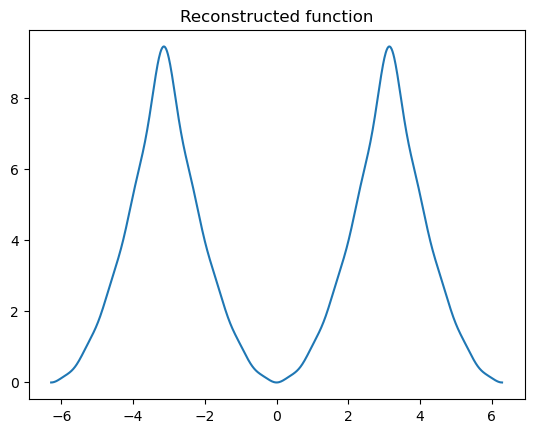

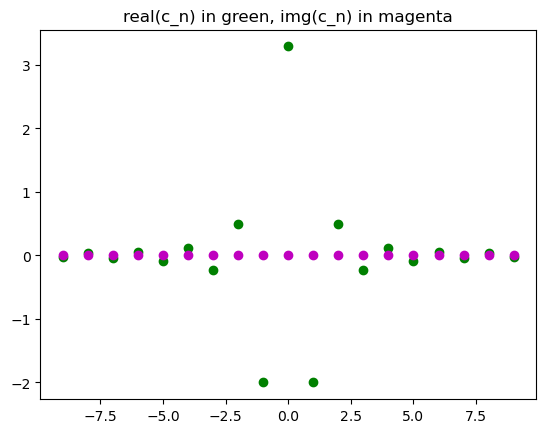

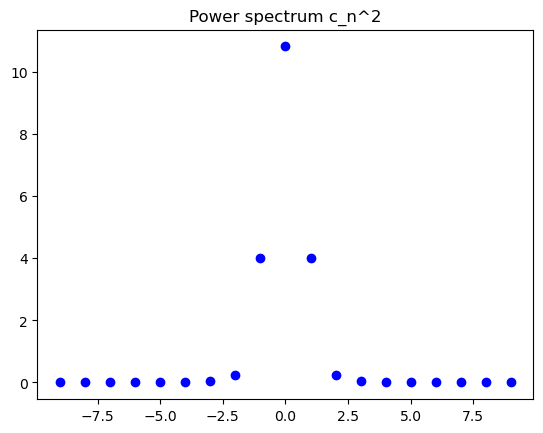

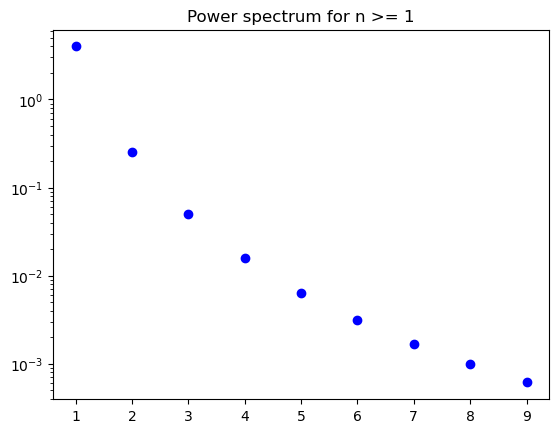

In [6]:
# Find the Fourier coefficiets for exponentials for the same function as above

# Set up arrays for cos sin coefficients, function at x, and x points to find function over, and 

c = np.zeros(n_max*2-1,dtype=complex)  # exp coefficients, go from -n_max to n_max

ff_e = np.zeros(n_points)   # array storing the function


# use integration to calcullate the c coefficients:

for n in np.arange(-n_max+1,n_max):
    def fnc_real(x):                              # function to integrate to find real part of c[n]
        #return(np.real(f1(x)*np.exp(-1j*n*x)))   # for -pi to pi only
        return(np.real(f1(x)*np.exp(-1j*n*x*2*np.pi/(interval_max-interval_min))))

    def fnc_imag(x):                              # function to integrate to find imaginary part of c[n]
        #return(np.imag(f1(x)*np.exp(-1j*n*x)))   # for -pi to pi only
        return(np.imag(f1(x)*np.exp(-1j*n*x*2*np.pi/(interval_max-interval_min))))


    c_n_r = integrate.quad(fnc_real,interval_min,interval_max)   # find the integral for real part of c[n]
    c_n_i = integrate.quad(fnc_imag,interval_min,interval_max)   # find the integral for imaginary part of c[n]
    c[n+n_max-1] = (1./((interval_max-interval_min)) * (c_n_r[0] + 1j*c_n_i[0]))                 # multiply by 1/(2*pi)


for i in np.arange(-n_max+1,n_max):
    print('c_',str(i).strip(),' = ',c[i+n_max-1])


# Add up the terms of the Fourier series at x and plot the function:

for n in np.arange(-n_max+1,n_max):
    ff_e = ff_e + c[n+n_max-1]*np.exp(1j*n*x*2*np.pi/(interval_max-interval_min))
    
    
plt.plot(x,ff_e.real)
plt.title('Reconstructed function')
plt.show()

plt.plot(np.arange(-n_max+1,n_max),np.real(c),'go')
plt.plot(np.arange(-n_max+1,n_max),np.imag(c),'mo')
plt.title('real(c_n) in green, img(c_n) in magenta')
plt.show()

plt.plot(np.arange(-n_max+1,n_max),np.abs(c)**2,'bo')
plt.title('Power spectrum c_n^2')
plt.show()

#plt.plot(np.arange(-n_max+1,n_max),np.abs(c[-n_max:])**2,'mo')
plt.plot(np.arange(1,n_max),np.abs(c[-(n_max-1):])**2,'bo')
plt.title('Power spectrum for n >= 1')
plt.yscale('log')
plt.show()


# Discret Fourier Transform

<h3>
    
In principle, the Fourier series is for continuous, repeating data.  There is also a Frouier transform for a continuous function from $-\infty$ to $\infty$, as long as it goes to 0 in both limits:
    
$ f(x) = \int_{-\infty}^{\infty} g(\alpha) e^{i \alpha x} dx $
    
$ g(\alpha) = \frac{1}{2 \pi } \int_{-\infty}^{\infty} f(x) e^{-i \alpha x} dx $
    
This will transform a function from real space into wavenumber space as a new, continuous function.
    
However, when dealing with data we do not have a continuous function.  We have a series of numbers, which are regularly spaced here.  So instead of doing an integral over all space, we can do a sum over the numbers we have.  
    
Our data only covers a finite range, so we have N samples between 0 and L, and we have values $y_n = f(x_n)$.  This gives us a new convention for the Discrete Fourier Transform $c_k$, where $k$ is the wave number:
    
$ c_k = \sum_{n=0}^{N-1} y_n e^{-i 2 \pi k n / N} $
    
Let's look at an example using the sunpot data we/ve seen before:

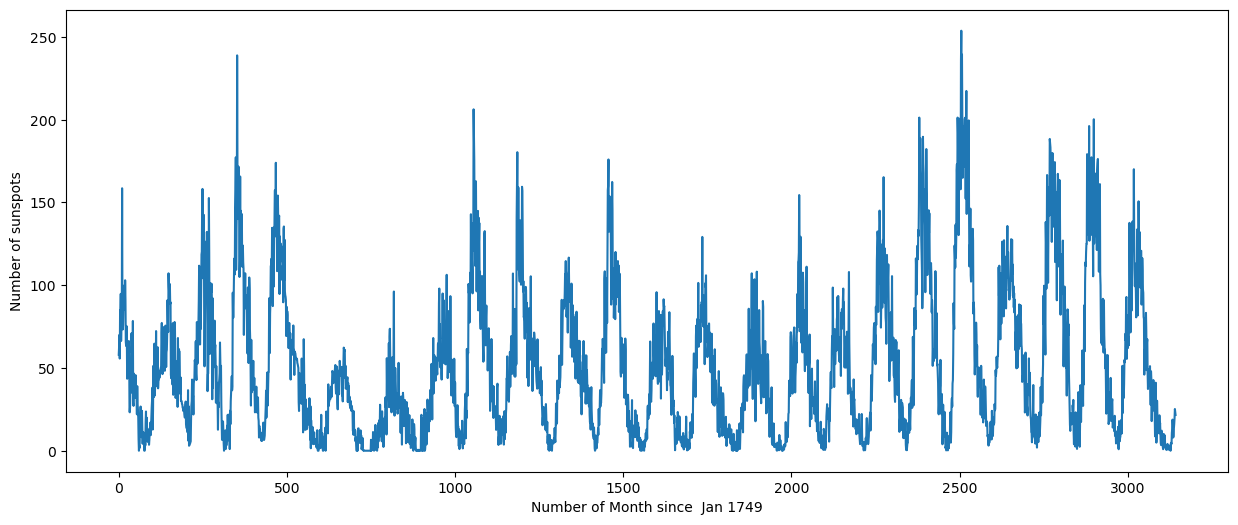

In [7]:
#Part A: Plot Sunspot versus time

# Loaded the data
sunspots = np.loadtxt("sunspots.txt")

#print (sunspots.shape)

# Plot # sunspot vs time in month number 
plt.figure(figsize=(15,6))

plt.plot(sunspots[ :, 0],sunspots[: , 1])
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.show()



[163198.7           +0.j          14414.58267477+15191.16504726j
  -1054.13559853+16829.90354705j ...  -9578.41104515+16623.84776116j
  -1054.13559846-16829.90354706j  14414.58267485-15191.16504724j]


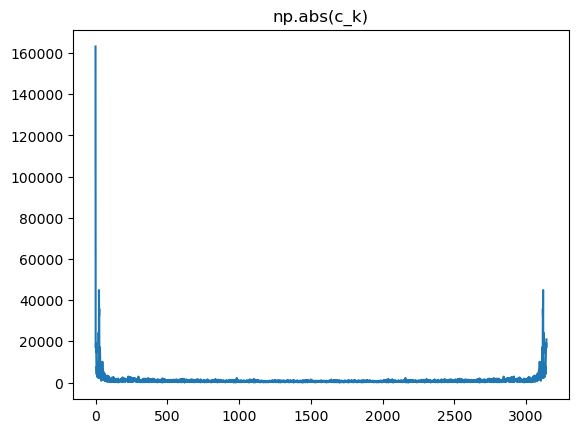

Average # of sunspots (c_0) =  (51.924498886414256+0j)


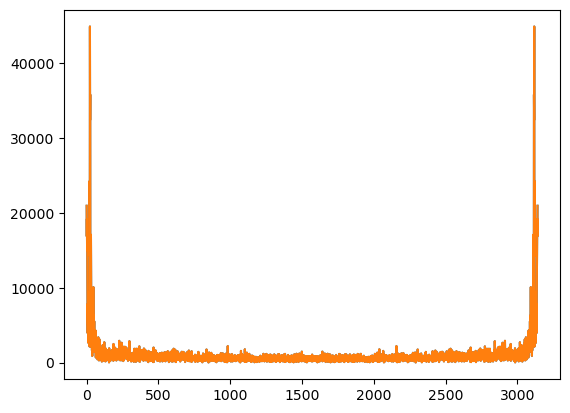

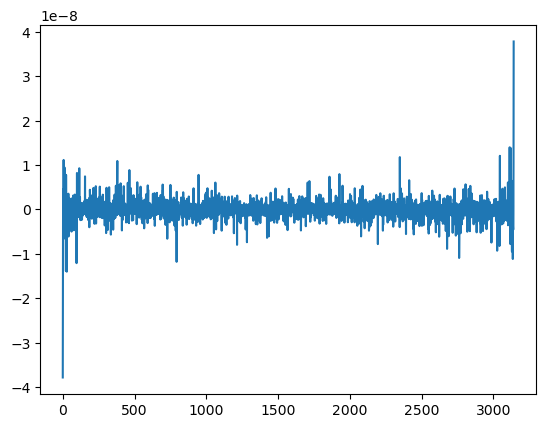

In [8]:
# Discrete Fourier Transform:

# Set up our y_n:

t_n = sunspots[:,0]
y_n = sunspots[:,1]

N = y_n.size

# Make a dft function:

def my_DFT(y):
    N = y.size
    c_k = np.zeros(N,dtype=complex)
    n = np.arange(N)+0j
    for k in np.arange(N):
        c_k[k] = np.sum(y*np.exp(-1j*2*np.pi*k*n/N))
    return c_k

#offset = 100
#t_n = t_n[offset:]
#y_n = y_n[offset:]



c_k = my_DFT(y_n)

print(c_k)

plt.plot(np.abs(c_k))
plt.title('np.abs(c_k)')
plt.show()


# The k=0 mode is a constant - the average value of our function times N - so we usually ignore it.

print('Average # of sunspots (c_0) = ',c_k[0]/N)

# Notice that the absolute value of the transform is symmetic about the middle.  So we can usually just use half:

plt.plot(np.abs(c_k[1:]))
plt.plot(np.abs(np.flip(c_k[1:])))
plt.show()


# The difference between each side nearly zero

plt.plot(np.abs(c_k[1:])-np.abs(np.flip(c_k[1:])))
plt.show()

1.0 3143.0


/var/folders/kx/h2dwjw7d65g6pv5hmhbnkfcc0000gp/T/ipykernel_71127/2685855989.py:10: RuntimeWarning: divide by zero encountered in divide
  period = max_t/np.arange(N)


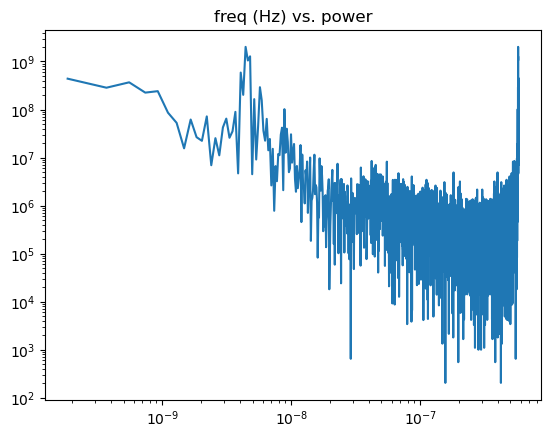

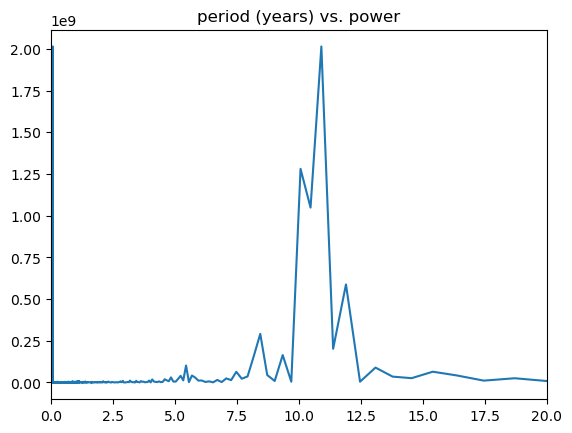

In [9]:
# Each c_k corresponds to a wavenumber k

# We can chage k into a period by using t_n.  For the sunspot data, t_n is in months

dt = t_n[1]-t_n[0]
N = t_n.size
max_t = dt*N

print(dt,max_t)
period = max_t/np.arange(N)   
freq_months = 1/(period)
freq = 1/(period*20*24*3600)

# The frequency is the cycles per time.


plt.plot(freq[1:],np.abs(c_k[1:])**2)
plt.xscale('log')
plt.yscale('log')
plt.title('freq (Hz) vs. power')
plt.show()


plt.plot(period[1:]/12,np.abs(c_k[1:])**2)
#plt.xscale('log')
plt.xlim([0,20])
#plt.yscale('log')
plt.title('period (years) vs. power')
plt.show()

        

# Periodicity

<h3>

As we can see, the Fourier Transform is really useful for picking out a period in the data.  We get something around 11 years, the period of the solar cycle.

We'll come back and talk about this some more.

</h3>
    
# Inverse Fourier Trasform

<h3>
    
We can do another transform to go back from wavenumber space to physical space.  How we've defined it, the inverse trasform is:
    
$ y_n = 1/N \sum_{k=0}^{N-1} c_k e^{i 2 \pi k n / N} $

Note that some definitions will be different.  You could have a $1/\sqrt{N}$ on both $c_k$ and $y_n$, or a $1/N$ on $c_k$ rather than $y_n$.


[58. -4.71791334e-12j 62.6-1.72465429e-11j 70. -2.60318624e-11j ...
 25.2+2.01495180e-11j 23.5-1.63205540e-11j 21.6+7.64866814e-12j]


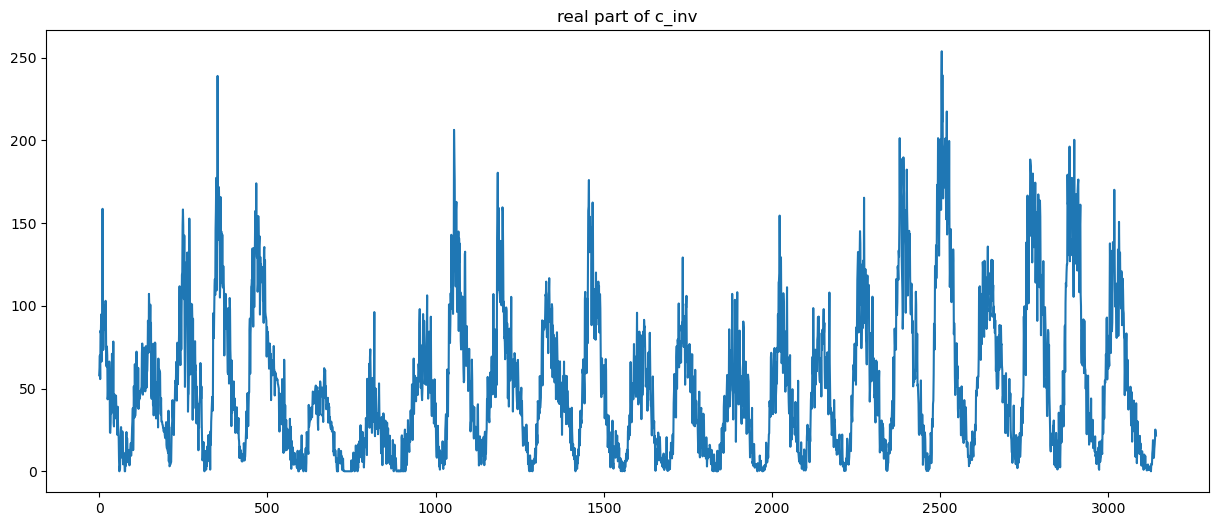

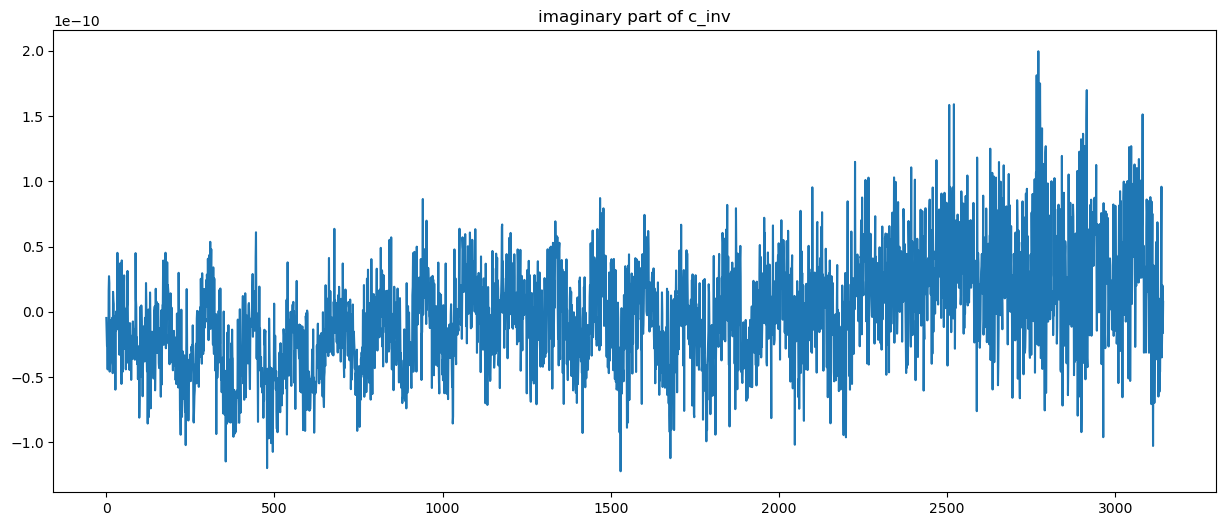

In [10]:
def my_inv_DFT(y):
    N = y.size
    c_k = np.zeros(N,dtype=complex)
    n = np.arange(N)+0j
    L = x[-1]-x[0]
    for k in np.arange(N):
        c_k[k] = np.sum(y*np.exp(1j*2*np.pi*k*n/N))/N
    return c_k


c_inv = my_inv_DFT(c_k)

plt.figure(figsize=(15,6))

print(c_inv)

plt.plot(np.real(c_inv))
plt.title('real part of c_inv')
plt.show()

plt.figure(figsize=(15,6))

plt.plot(np.imag(c_inv))
plt.title('imaginary part of c_inv')
plt.show()

# Build in functons

<h3>
    
There are built-in functions what will do this for you: np.fft.fft and np.fft.ifft  
    
If we start with a set of real number, we can use np.fft.rfft and np.fft.irfft  
    
This just gives us the first half of the number, since we don't need the rest:

[ 1.63198700e+05    +0.j          1.44145827e+04+15191.16504726j
 -1.05413560e+03+16829.90354705j ...  8.87444333e+01  +426.27178325j
  8.18389672e+02  -276.51197688j  5.93462732e+02  -891.21893228j]


/var/folders/kx/h2dwjw7d65g6pv5hmhbnkfcc0000gp/T/ipykernel_71127/2399098296.py:9: RuntimeWarning: divide by zero encountered in divide
  per = 1/freq   # Period in months


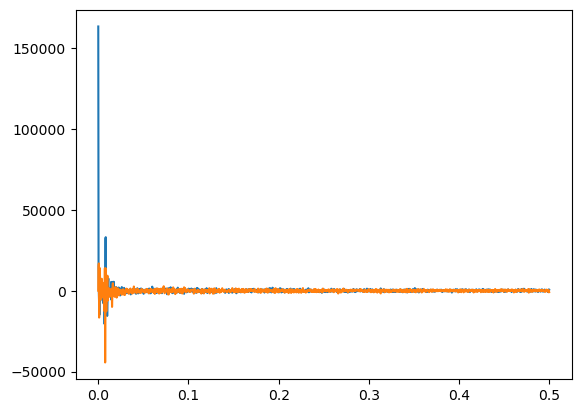

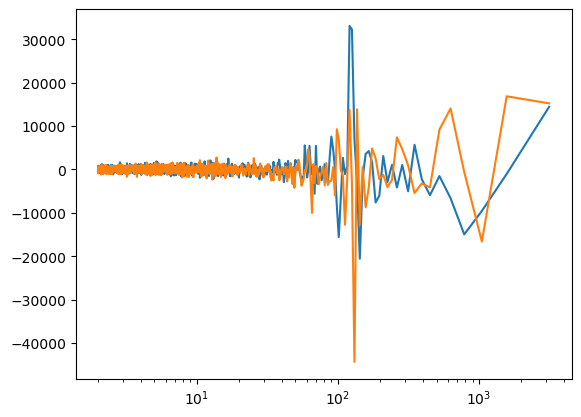

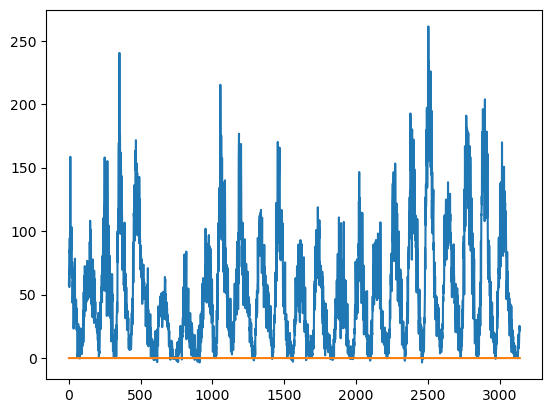

In [60]:
ff_a = np.fft.rfft(y_n)

inverse_ff_a = np.fft.irfft(ff_a)
#inverse_ff_a = np.fft.ifft(np.abs(ff_a))

print(ff_a)

freq = np.arange(ff_a.size)/y_n.size   # Frequency in per month
per = 1/freq   # Period in months

plt.plot(freq,np.real(ff_a))
plt.plot(freq,np.imag(ff_a))
#plt.plot(np.abs(ff_a))
#plt.yscale('log')
#plt.xlim(0,30)
plt.show()

plt.plot(per,np.real(ff_a))
plt.plot(per,np.imag(ff_a))
#plt.plot(np.abs(ff_a))
plt.xscale('log')
#plt.xlim(100,300)
plt.show()


plt.plot(np.real(inverse_ff_a))
plt.plot(np.imag(inverse_ff_a))
plt.show()


# Filtering and Smoothing

<h3>
    
Another use of the fourier transform is filtering.  We do the transform, then get rid of the frequencies we don't want.  For exmaple, we can make a high-pass or low-pass filter with a Fourier transform.  Or we can smooth our data by removing the high frequencies. 
  
</h3>
    
## Note that smoothing is different than fitting a function - we are not assuming any underlying shape to our data to begin with
    
<h3>
    
Below, we smooth the sunspot data by taking out period shorter than 24, 96, and 360 months using np.argwhere:
    

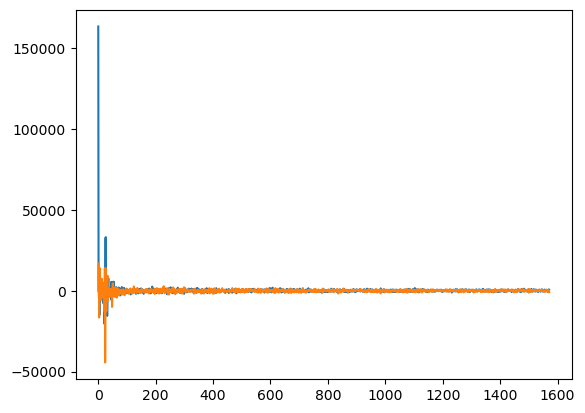

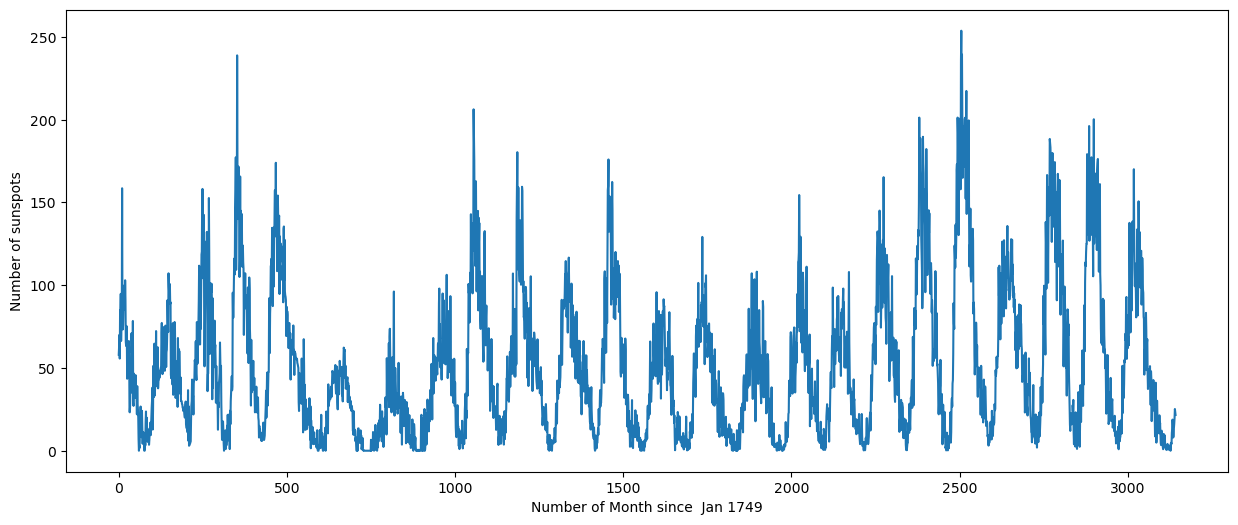

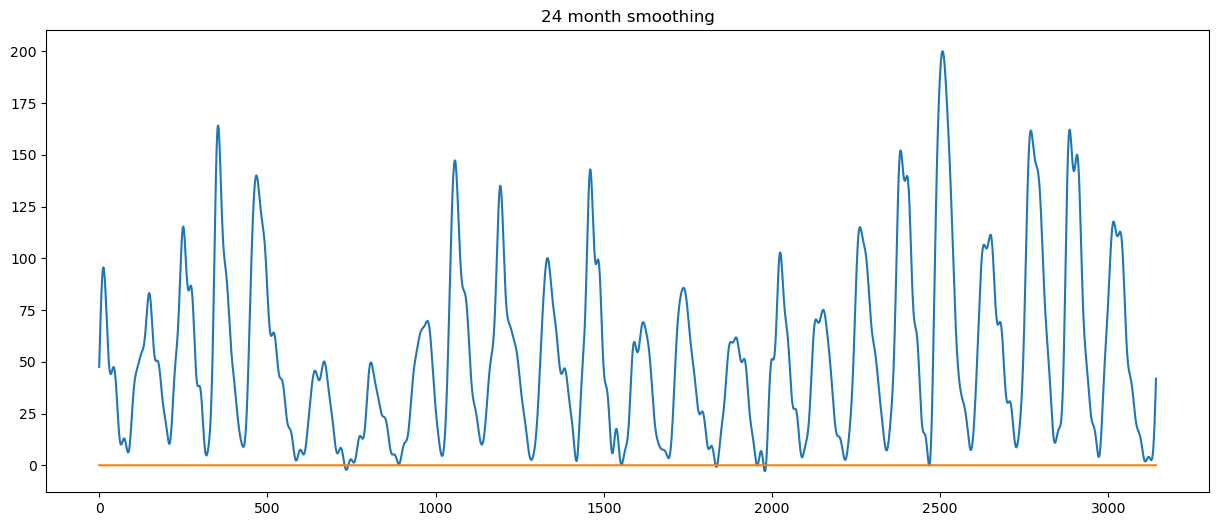

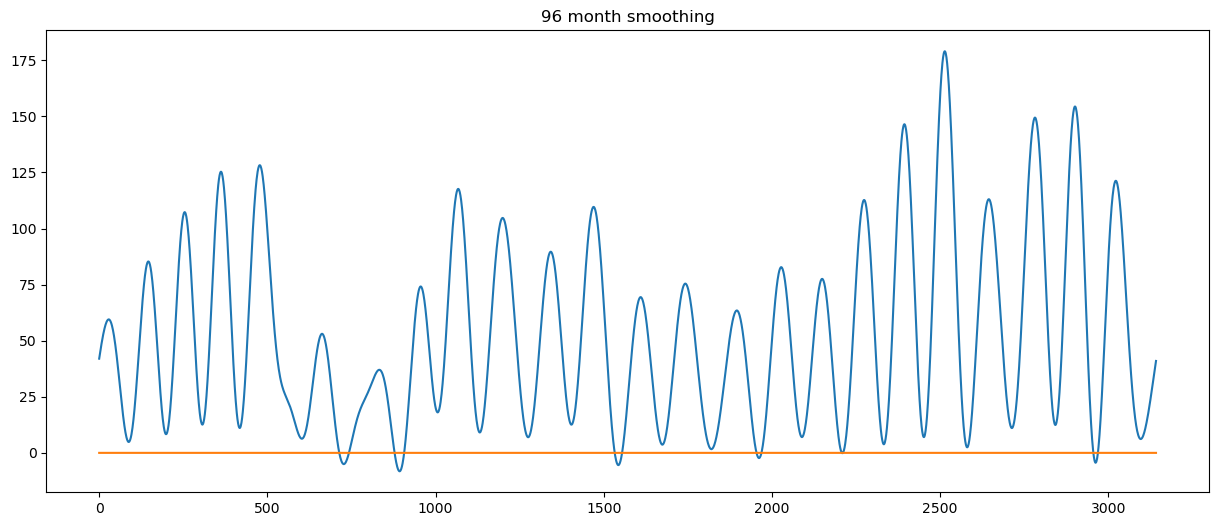

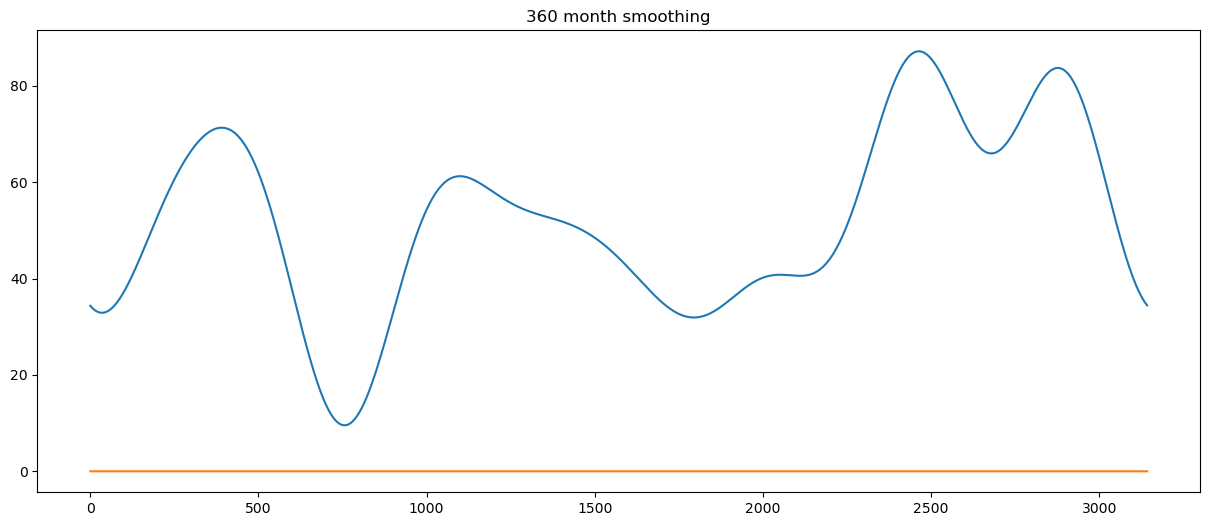

In [61]:
ff_a = np.fft.rfft(y_n)

ww = np.argwhere(period > 24)
ww = ww[:,0]

#inverse_ff_a = np.fft.ifft(ff_a)
inverse_ff_a = np.fft.irfft(ff_a[ww],N)


plt.plot(np.real(ff_a))
plt.plot(np.imag(ff_a))
#plt.plot(np.abs(ff_a))
#plt.yscale('log')
#plt.xlim(0,30)
plt.show()


plt.figure(figsize=(15,6))

plt.plot(sunspots[ :, 0],sunspots[: , 1])
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.show()



plt.figure(figsize=(15,6))

plt.plot(np.real(inverse_ff_a))
plt.plot(np.imag(inverse_ff_a))
plt.title('24 month smoothing')
plt.show()


ww = np.argwhere(period > 96)
ww = ww[:,0]
inverse_ff_a_48 = np.fft.irfft(ff_a[ww],N)


plt.figure(figsize=(15,6))

plt.plot(np.real(inverse_ff_a_48))
plt.plot(np.imag(inverse_ff_a_48))
plt.title('96 month smoothing')
plt.show()


ww = np.argwhere(period > 360)
ww = ww[:,0]
inverse_ff_a = np.fft.irfft(ff_a[ww],N)


plt.figure(figsize=(15,6))

plt.plot(np.real(inverse_ff_a))
plt.plot(np.imag(inverse_ff_a))
plt.title('360 month smoothing')
plt.show()



## Filtering

<h3>

We can also sue Fourier transforms to get rid of low-frequency data, or both high and low frequencies.

Let's get rid of the period signal and just see how noisy our sunsport data is:

</h3>

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
3143
1572


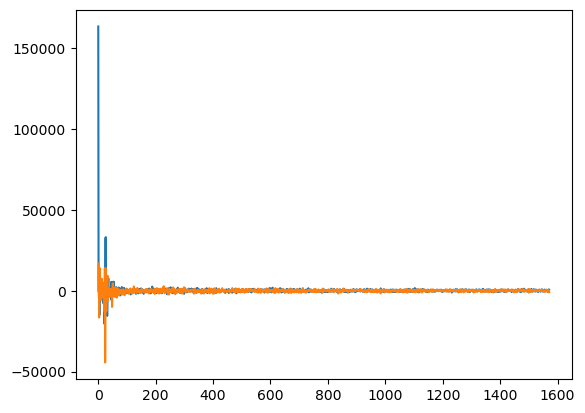

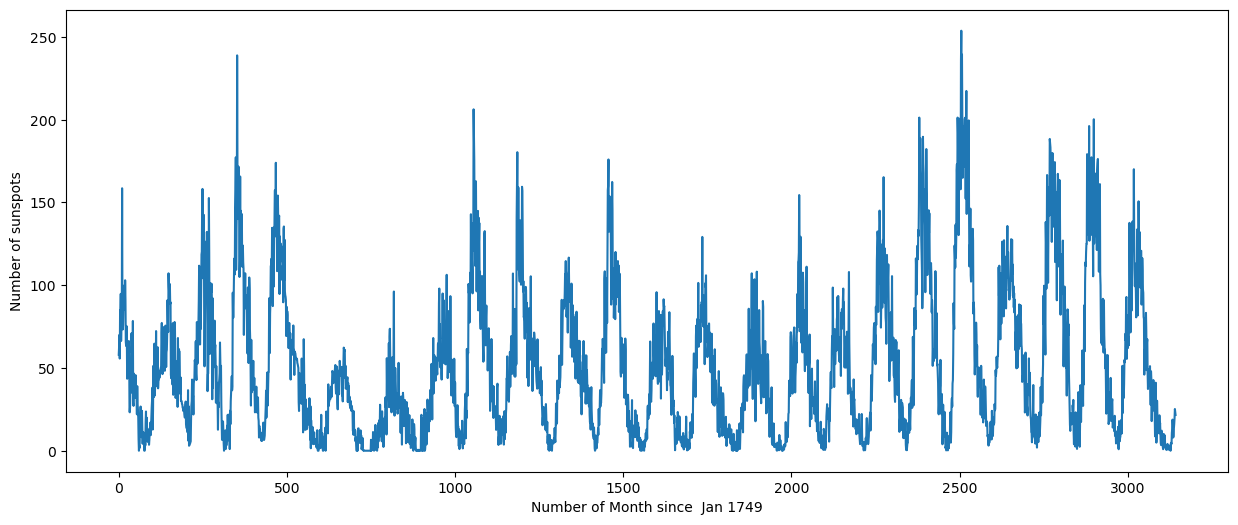

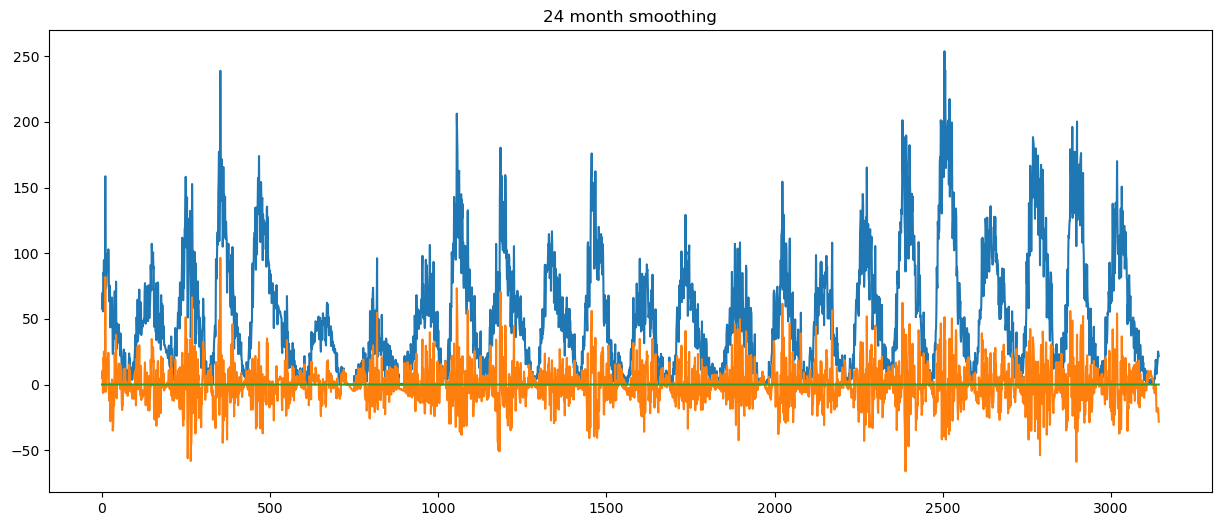

In [62]:
ff_a = np.fft.rfft(y_n)

wz = np.argwhere(period[0:ff_a.size] > 48)   # Need to limit the period to half the full size.
wz = wz[:,0]

ff_b = np.copy(ff_a)
ff_b[wz] = 0.

print(wz)
print(period.size)
print(ff_b.size)

#inverse_ff_a = np.fft.ifft(ff_a)
inverse_ff_a = np.fft.irfft(ff_b,N)


plt.plot(np.real(ff_a))
plt.plot(np.imag(ff_a))
#plt.plot(np.abs(ff_a))
#plt.yscale('log')
#plt.xlim(0,30)
plt.show()


plt.figure(figsize=(15,6))

plt.plot(sunspots[ :, 0],sunspots[: , 1])
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.show()



plt.figure(figsize=(15,6))

plt.plot(sunspots[ :, 0],sunspots[: , 1])
plt.plot(np.real(inverse_ff_a))
plt.plot(np.imag(inverse_ff_a))
plt.title('24 month smoothing')
plt.show()




<h3>

So we see some noise.  Does seem to still be some structure here - looks like more nosie when there's more sunspots.

Now let's filter our long and short periods, so we just see the period signal.  Note that this will also remove the average.
    
</h3>

3143
1572


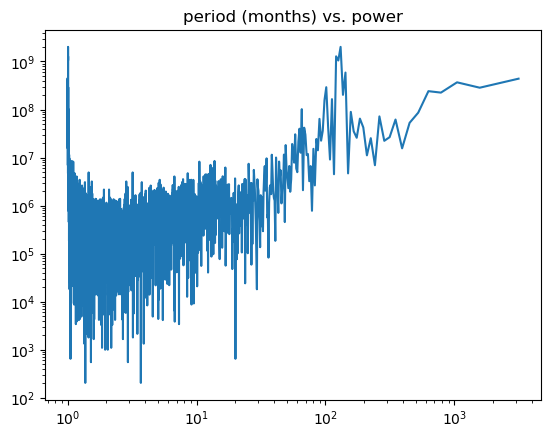

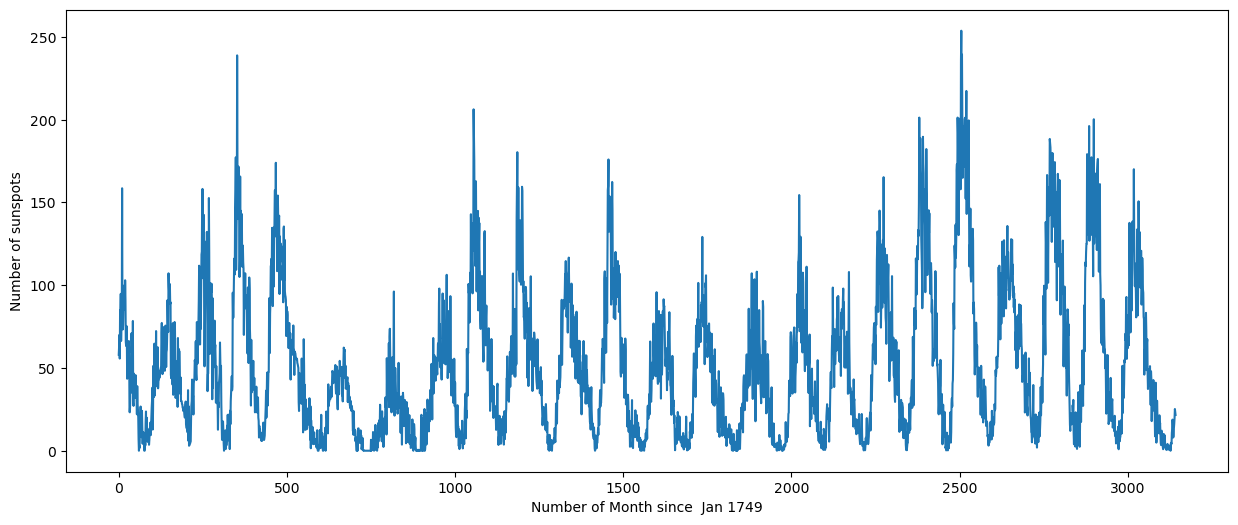

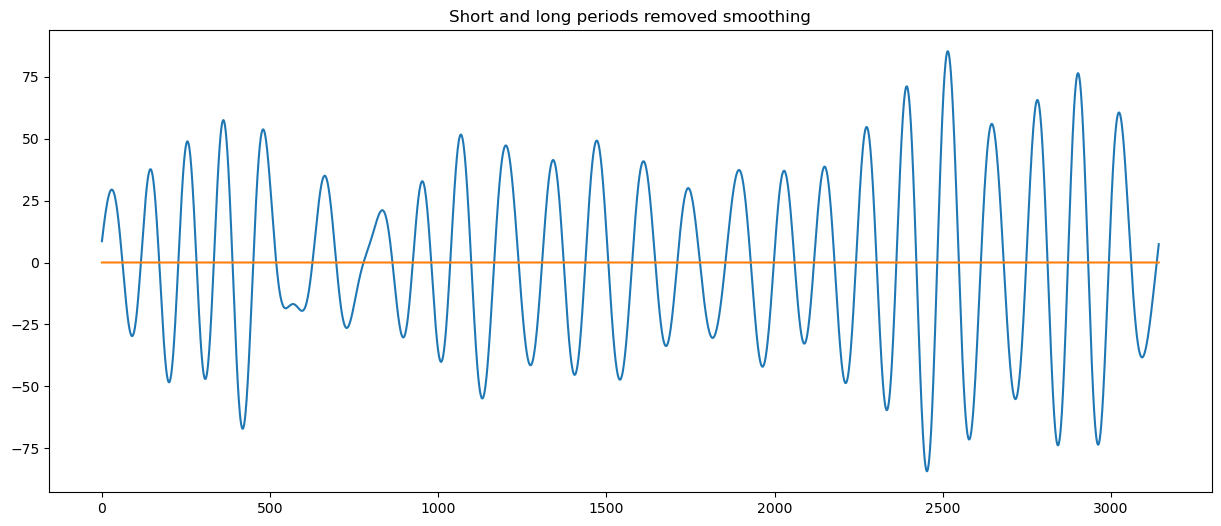

In [63]:
ff_a = np.fft.rfft(y_n)

# Keep more than some number of months

wz = np.argwhere(period[0:ff_a.size] < 96)
wz = wz[:,0]

ff_b = np.copy(ff_a)
ff_b[wz] = 0.

# And keep less than some number of months

wz2 = np.argwhere(period > 240)   
wz2 = wz2[:,0]

ff_b[wz2] = 0.

print(period.size)
print(ff_b.size)

#inverse_ff_a = np.fft.ifft(ff_a)
inverse_ff_a = np.fft.irfft(ff_b,N)


# Take a look at the Fourier transform again:

plt.plot(period[1:],np.abs(c_k[1:])**2)
plt.xscale('log')
#plt.xlim([0,20])
plt.yscale('log')
plt.title('period (months) vs. power')
plt.show()



plt.figure(figsize=(15,6))

plt.plot(sunspots[ :, 0],sunspots[: , 1])
plt.xlabel("Number of Month since  Jan 1749")
plt.ylabel("Number of sunspots")
plt.show()



plt.figure(figsize=(15,6))

plt.plot(np.real(inverse_ff_a))
plt.plot(np.imag(inverse_ff_a))
plt.title('Short and long periods removed smoothing')
plt.show()




## Period Search

<h3>

We found a pretty good period of about 11 years, but really only certain period are in out data, based on how long our data series is.

We'd like a way to search over more period nad find a real best period.

I'm not sure if this is the best way to do it, but let's try truncating our data at the beginning to vary the period allowed.
    
</h3>

Periods in years and power = 
26.19 2.65e+07
23.81 2.23e+07
21.83 7.18e+07
20.15 6.92e+06
18.71 2.53e+07
17.46 1.11e+07
16.37 4.23e+07
15.41 6.46e+07
14.55 2.58e+07
13.79 3.52e+07
13.10 8.93e+07
12.47 4.67e+06
11.91 5.88e+08
11.39 2.02e+08
10.91 2.01e+09
10.48 1.05e+09
10.07 1.28e+09
9.70 4.49e+06
9.35 1.64e+08
9.03 9.09e+06
8.73 4.43e+07
8.45 2.91e+08
8.18 1.57e+08
7.94 3.62e+07
7.70 2.24e+07
7.48 6.38e+07
7.28 1.42e+07
7.08 2.43e+07
6.89 2.63e+06
6.72 1.52e+07
6.55 7.78e+05
6.39 6.63e+06
6.24 3.21e+06
6.09 1.18e+07
5.95 1.12e+07
5.82 2.99e+07
5.69 4.18e+07
5.57 2.09e+06
5.46 1.02e+08
5.35 1.26e+07


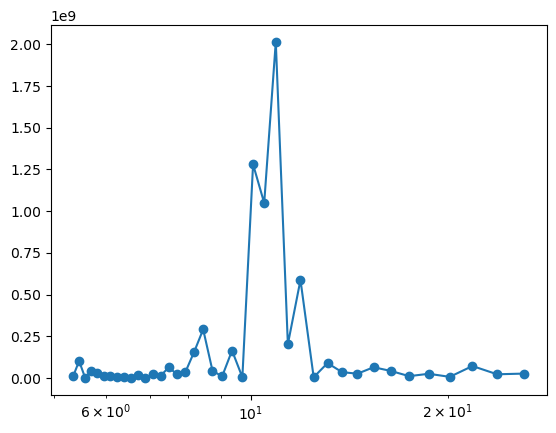

In [69]:
# First, print the periods we have available using all out data:

print('Periods in years and power = ')
for i in np.arange(10,50):
    print('%.2f %.2e' % (per[i]/12,np.abs(ff_a[i])**2))

plt.plot(per[10:50]/12,np.abs(ff_a[10:50])**2,'-o')
plt.xscale('log')
plt.show()



/var/folders/kx/h2dwjw7d65g6pv5hmhbnkfcc0000gp/T/ipykernel_71127/3658984690.py:13: RuntimeWarning: divide by zero encountered in divide
  per_i = 1/freq_i   # Period in months


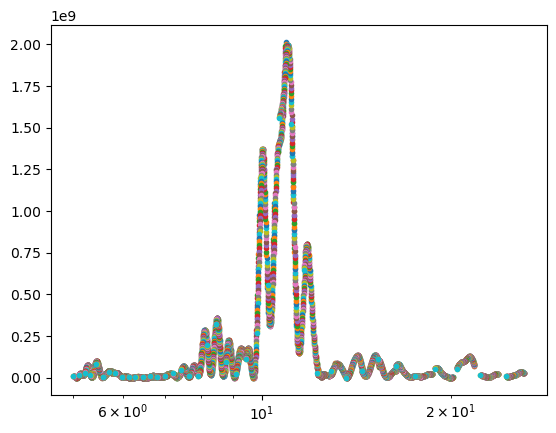

N =  3143 3143


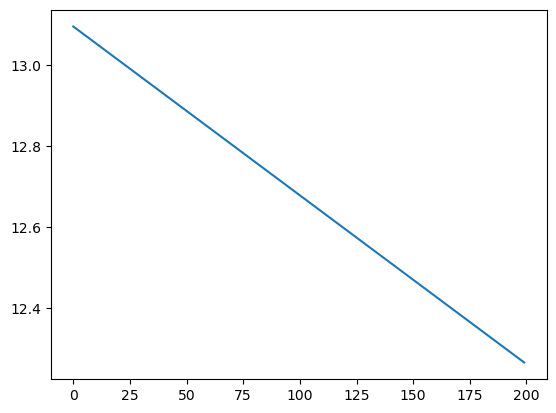

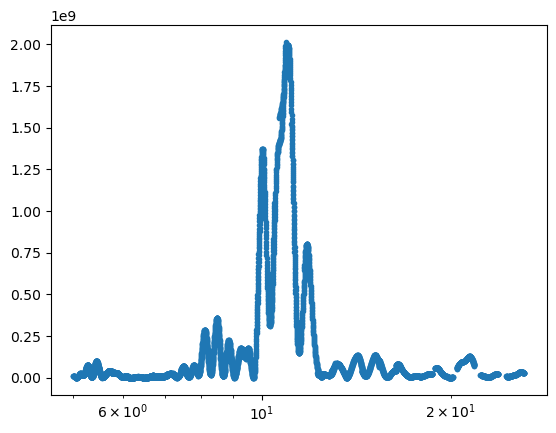

14
10.913194444444443 2014337126.322072


In [110]:
# Now scan over a range of frequencies

n_scan = 200   # how many sets of data to scan over
n_keep = 1000  # how many values of the period to keep

per_arr = np.zeros([n_scan,n_keep])
power_arr = np.zeros([n_scan,n_keep])

for i in np.arange(0,n_scan):
    ff_i = np.fft.rfft(y_n[i:])

    freq_i = np.arange(ff_a.size)/y_n[i:].size   # Frequency in per month
    per_i = 1/freq_i   # Period in months

    per_arr[i,:] = per_i[0:n_keep]
    power_arr[i,:] = np.abs(ff_i[0:n_keep])**2


for i in np.arange(0,n_scan):
    plt.plot(per_arr[i,10:50]/12,power_arr[i,10:50],'.')

plt.xscale('log')
plt.show()

print('N = ',N,y_n.size)

plt.plot(per_arr[:,20]/12)
plt.show()

per_arr_flat = per_arr[:,10:50].flatten()
power_arr_flat = power_arr[:,10:50].flatten()

plt.plot(per_arr_flat/12,power_arr_flat,'.')
plt.xscale('log')
plt.show()

pmax = np.argmax(power_arr_flat)
print(pmax)

print(per_arr_flat[pmax]/12,power_arr_flat[pmax])


<h3>

The maximum power I got is at a period of 10.913 years, so probably not too bad?  Might be better ways to do this.

We can also see there is some real width to the power.  It's not just a narrow spike, there is a real spread with power at slightly shorter and longer periods.
    
</h3>